In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
import random as rd
import matplotlib.ticker as mtick
import re
from sklearn.linear_model import LogisticRegression
# Setting visual attributes
sns.set()

pd.set_option('display.max_columns', None)

DATA_PATH = "data/"

# 1. Loading the Data

In [2]:
# Loading datasets
swissData_1 =  pd.read_excel(DATA_PATH + "swissdata.xlsx", encoding = "ISO-8859-1", sheet_name='Sheet1')
swissData_2 =  pd.read_excel(DATA_PATH + "swissdata.xlsx", encoding = "ISO-8859-1", sheet_name="Sheet2")

dataCities =  pd.read_csv(DATA_PATH + "dataCities.csv", encoding = "ISO-8859-1"  , index_col = 0, low_memory=False)

# Cleaning the data
swissData_2 = swissData_2.reset_index().drop(['level_0','level_1'], axis=1).set_index('n1').sort_values('n1')

display(dataCities.head())
#display(swissData_1.head())
#display(swissData_2.head())

,Nmbr,JobState,Job,Civil,YearOfBirth,Gender,Own/Rent,Lang,Nation,ZIP,Children_0-26,Car1_Canton,Car1_Brand,Car1_Class,Car1_Price,Car1_1Imtr,Car1_ccm,Car1_ClaimsCt5Y,Car1_ClaimsSum5Y,Car2_Canton,Car2_Brand,Car2_Class,Car2_Price,Car2_1Imtr,Car2_ccm,Car2_ClaimsCt5Y,Car2_ClaimsSum5Y,Car_Premium,HH_Zip,HH_Ins_Sum,Stand_of_furn,Rooms,Build_Zip,Build_Ins_Sum,Year_of_constr,Type,HHaB_ClaimsCt5Y,HHaB_ClaimsSum5Y,HH_and_Bld_Prem.,Zip,BFS,City
0,P-10000907,Angestellt,0000 ...,Ledig,1948,W,M,D,CH,5600,0,,,,0,0,0,0,0.0,,,,0,0,0,0,0.0,0.0,5600,59000,1,3.5,0,0,0,Mehrfamilienhaus über 3 Wohnungen,0,0.0,266.50,5600,4201,Lenzburg
1,P-10000951,Rentner,0000 ...,Verwitwet,1927,M,M,D,CH,5600,0,,,,0,0,0,0,0.0,,,,0,0,0,0,0.0,0.0,5600,39000,2,1.5,0,0,0,"Heim, Spital, Anstalt",3,3167.2,334.10,5600,4201,Lenzburg
2,P-10001026,Hausfrau,0000 ...,Ledig,1943,W,E,D,CH,5034,0,,,,0,0,0,0,0.0,,,,0,0,0,0,0.0,0.0,5034,78000,1,4,0,0,0,Mehrfamilienhaus über 3 Wohnungen,0,0.0,462.80,5034,4012,Suhr
3,P-10001074,Rentner,0000 ...,Verheiratet,1928,M,E,D,CH,5034,0,,,,0,0,0,0,0.0,,,,0,0,0,0,0.0,0.0,5034,100000,0,NA,0,0,0,Einfamilienhaus,0,0.0,443.45,5034,4012,Suhr
4,P-10001083,Rentner,0000 ...,Verwitwet,1922,W,M,D,CH,5600,0,,,,0,0,0,0,0.0,,,,0,0,0,0,0.0,0.0,5600,19000,0,NA,0,0,0,Mehrfamilienhaus über 3 Wohnungen,1,0.0,146.15,5600,4201,Lenzburg


# 2. Selecting Features

In [5]:
columns = dataCities.columns
# Selecting the features
dataCities_r = dataCities.drop(columns[[0,2,9,11,12,13,15,16,19,20,21,23,24,28,32,35]], axis=1)

dataCities_r.head()

,JobState,Civil,YearOfBirth,Gender,Own/Rent,Lang,Nation,Children_0-26,Car1_Price,Car1_ClaimsCt5Y,Car1_ClaimsSum5Y,Car2_Price,Car2_ClaimsCt5Y,Car2_ClaimsSum5Y,Car_Premium,HH_Ins_Sum,Stand_of_furn,Rooms,Build_Ins_Sum,Year_of_constr,HHaB_ClaimsCt5Y,HHaB_ClaimsSum5Y,HH_and_Bld_Prem.,Zip,BFS,City
0,Angestellt,Ledig,1948,W,M,D,CH,0,0,0,0.0,0,0,0.0,0.0,59000,1,3.5,0,0,0,0.0,266.50,5600,4201,Lenzburg
1,Rentner,Verwitwet,1927,M,M,D,CH,0,0,0,0.0,0,0,0.0,0.0,39000,2,1.5,0,0,3,3167.2,334.10,5600,4201,Lenzburg
2,Hausfrau,Ledig,1943,W,E,D,CH,0,0,0,0.0,0,0,0.0,0.0,78000,1,4,0,0,0,0.0,462.80,5034,4012,Suhr
3,Rentner,Verheiratet,1928,M,E,D,CH,0,0,0,0.0,0,0,0.0,0.0,100000,0,NA,0,0,0,0.0,443.45,5034,4012,Suhr
4,Rentner,Verwitwet,1922,W,M,D,CH,0,0,0,0.0,0,0,0.0,0.0,19000,0,NA,0,0,1,0.0,146.15,5600,4201,Lenzburg


# 3. Manupulating Data

## 3.1. Translating the Columns

In [6]:
from textblob import TextBlob

def requestTranslation(List_o):
    '''
    Gets a list of german words and returns the original and translated pairs
    '''
    # Initilization the lists
    List_g = []
    List_t = []
    
    for german_word in List_o:
        List_g.append(german_word)
        # Try to capture the untranslated words
        if  german_word.isspace():
            List_t.append("unknown")
        else:
            # Creatinf TextBlob object
            blob = TextBlob(str(german_word))
            try:
                #Translating
                List_t.append(blob.translate(from_lang='de', to='en').split("TextBlob")[0])
            except:
                List_t.append(german_word)
                
    return List_g, List_t 


In [7]:
# Translating two columns "JobState" and "Civil"
Job_list = requestTranslation(dataCities_r.JobState.unique())
Civil_list = requestTranslation(dataCities_r.Civil.unique())
# Replacing the translated texts
dataCities_r = dataCities_r.replace({"JobState": dict(zip(Job_list[0],Job_list[1])), "Civil": dict(zip(Civil_list[0],Civil_list[1]))})


,JobState,Civil,YearOfBirth,Gender,Own/Rent,Lang,Nation,Children_0-26,Car1_Price,Car1_ClaimsCt5Y,Car1_ClaimsSum5Y,Car2_Price,Car2_ClaimsCt5Y,Car2_ClaimsSum5Y,Car_Premium,HH_Ins_Sum,Stand_of_furn,Rooms,Build_Ins_Sum,Year_of_constr,HHaB_ClaimsCt5Y,HHaB_ClaimsSum5Y,HH_and_Bld_Prem.,Zip,BFS,City
0,employed,Single,1948,W,M,D,CH,0,0,0,0.0,0,0,0.0,0.0,59000,1,3.5,0,0,0,0.0,266.50,5600,4201,Lenzburg
1,pensioner,Widowed,1927,M,M,D,CH,0,0,0,0.0,0,0,0.0,0.0,39000,2,1.5,0,0,3,3167.2,334.10,5600,4201,Lenzburg
2,housewife,Single,1943,W,E,D,CH,0,0,0,0.0,0,0,0.0,0.0,78000,1,4,0,0,0,0.0,462.80,5034,4012,Suhr
3,pensioner,Married,1928,M,E,D,CH,0,0,0,0.0,0,0,0.0,0.0,100000,0,NA,0,0,0,0.0,443.45,5034,4012,Suhr
4,pensioner,Widowed,1922,W,M,D,CH,0,0,0,0.0,0,0,0.0,0.0,19000,0,NA,0,0,1,0.0,146.15,5600,4201,Lenzburg


## 3.2. Changing data with White spaces and 'NA' to 'Unknown'

In [8]:
# Changing values with 'White Space' to 'Unknown'
dataCities_r = dataCities_r.replace(r'^\s*$', 'unknown', regex=True)
dataCities_r = dataCities_r.fillna('unknown')

In [9]:
dataCities_r = dataCities_r.replace('NA\s*', 'unknown', regex=True)


,JobState,Civil,YearOfBirth,Gender,Own/Rent,Lang,Nation,Children_0-26,Car1_Price,Car1_ClaimsCt5Y,Car1_ClaimsSum5Y,Car2_Price,Car2_ClaimsCt5Y,Car2_ClaimsSum5Y,Car_Premium,HH_Ins_Sum,Stand_of_furn,Rooms,Build_Ins_Sum,Year_of_constr,HHaB_ClaimsCt5Y,HHaB_ClaimsSum5Y,HH_and_Bld_Prem.,Zip,BFS,City
0,employed,Single,1948,W,M,D,CH,0,0,0,0.0,0,0,0.0,0.0,59000,1,3.5,0,0,0,0.0,266.50,5600,4201,Lenzburg
1,pensioner,Widowed,1927,M,M,D,CH,0,0,0,0.0,0,0,0.0,0.0,39000,2,1.5,0,0,3,3167.2,334.10,5600,4201,Lenzburg
2,housewife,Single,1943,W,E,D,CH,0,0,0,0.0,0,0,0.0,0.0,78000,1,4,0,0,0,0.0,462.80,5034,4012,Suhr
3,pensioner,Married,1928,M,E,D,CH,0,0,0,0.0,0,0,0.0,0.0,100000,0,unknown,0,0,0,0.0,443.45,5034,4012,Suhr
4,pensioner,Widowed,1922,W,M,D,CH,0,0,0,0.0,0,0,0.0,0.0,19000,0,unknown,0,0,1,0.0,146.15,5600,4201,Lenzburg


## 4. Exploratory Data Analysis

### 4.1. Looking into 'Unknown' and 'Zeros' percentage

In [10]:
# Displaying Percentage of overall 'Unknowns'
dis = pd.DataFrame((dataCities_r=='unknown').sum(axis=0)/dataCities_r.count(axis=0)*100.0)
dis.columns = ['Percentage_Unknown']
dis['Percentage_Unknown'] = dis['Percentage_Unknown'].apply(lambda x:str(np.around(x,2))+"%")
# Displaying Percentage of overall Zeros
dis['Percentage_Zeros'] = pd.DataFrame((dataCities_r==0).sum(axis=0)/dataCities_r.count(axis=0)*100.0)
dis['Percentage_Zeros'] = dis['Percentage_Zeros'].apply(lambda x:str(np.around(x,2))+"%")
dis['Percentage_Overall'] = pd.DataFrame(((dataCities_r==0).sum(axis=0)+
                                          (dataCities_r=='unknown').sum(axis=0))/dataCities_r.count(axis=0)*100.0)
dis['Percentage_Overall'] = dis['Percentage_Overall'].apply(lambda x:str(np.around(x,2))+"%")
display(dis)

,Percentage_Unknown,Percentage_Zeros,Percentage_Overall
JobState,11.94%,0.0%,11.94%
Civil,11.34%,0.0%,11.34%
YearOfBirth,0.0%,0.0%,0.0%
Gender,11.16%,0.0%,11.16%
Own/Rent,2.56%,0.0%,2.56%
Lang,0.0%,0.0%,0.0%
Nation,11.16%,0.0%,11.16%
Children_0-26,0.0%,81.95%,81.95%
Car1_Price,0.0%,67.77%,67.77%
Car1_ClaimsCt5Y,0.0%,81.73%,81.73%


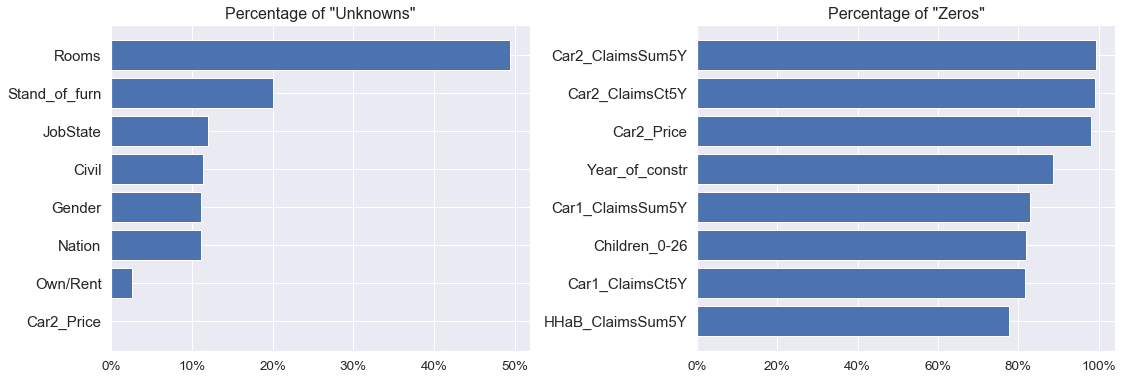

In [9]:
### Plotting
fig, axes = plt.subplots(1,2, figsize=(18,6))
# Plotting the Percentage of Unknowns
axes[0].barh(dis['Percentage_Unknown'].map(lambda x:re.findall(r'^(\d+\.\d+)\%?', x)[0])\
               .astype(float).sort_values().index.values[-8:],
               dis['Percentage_Unknown'].map(lambda x:re.findall(r'^(\d+\.\d+)\%?', x)[0])\
               .astype(float).sort_values()[-8:])
axes[0].set_title('Percentage of "Unknowns"', fontsize=16)
axes[0].tick_params(axis = 'y', which = 'major', labelsize = 15)
axes[0].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
axes[0].xaxis.set_major_formatter(mtick.PercentFormatter())

# Plotting the Percentage of Zeros
axes[1].barh(dis['Percentage_Zeros'].map(lambda x:re.findall(r'^(\d+\.\d+)\%?', x)[0])\
               .astype(float).sort_values().index.values[-8:],
               dis['Percentage_Zeros'].map(lambda x:re.findall(r'^(\d+\.\d+)\%?', x)[0])\
               .astype(float).sort_values()[-8:])
axes[1].set_title('Percentage of "Zeros"', fontsize=16)
axes[1].tick_params(axis = 'y', which = 'major', labelsize = 15)
axes[1].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
axes[1].xaxis.set_major_formatter(mtick.PercentFormatter())

plt.subplots_adjust(wspace=0.4)
plt.show()

### 4.2. Looking into Categorical Features

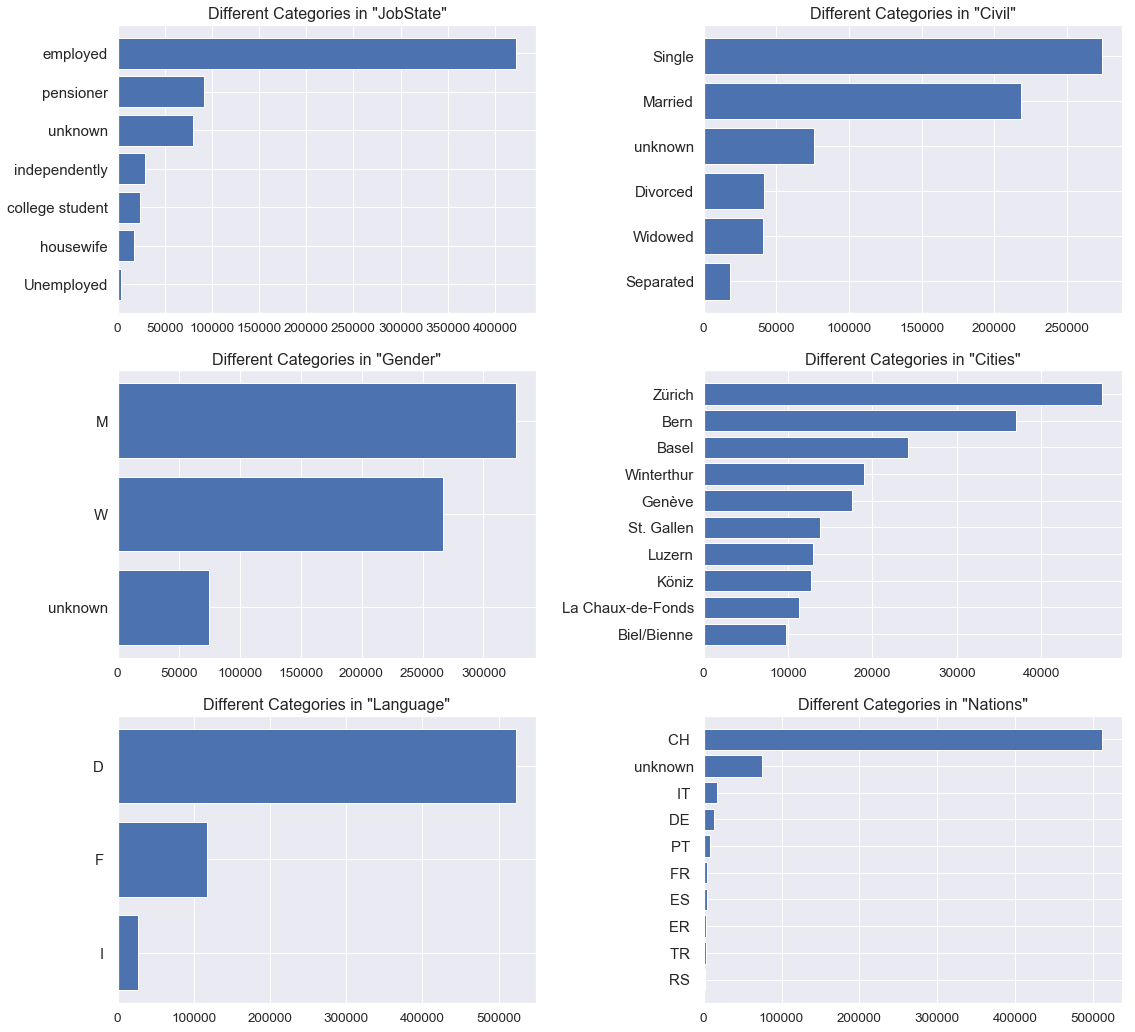

In [11]:
### Plotting the Categorical Features

# Counting different categorical values
x_JobState = dataCities_r.JobState.value_counts().sort_values()
x_Civil = dataCities_r.Civil.value_counts().sort_values()
x_Gender = dataCities_r.Gender.value_counts().sort_values()
x_City = dataCities_r.City.value_counts().sort_values()
x_Lang = dataCities_r.Lang.value_counts().sort_values()
x_Nation = dataCities_r.Nation.value_counts().sort_values()

# Plotting
fig, axes = plt.subplots(3,2, figsize=(18,18))
# Plotting the First axis 
axes[0,0].barh(x_JobState.index.values,x_JobState)
#axes[0,0].set_xlabel('Number', fontsize=18)
axes[0,0].set_title('Different Categories in "JobState"', fontsize=16)
axes[0,0].tick_params(axis = 'y', which = 'major', labelsize = 15)
axes[0,0].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
# Plotting the Second axis 
axes[0,1].barh(x_Civil.index.values,x_Civil)
axes[0,1].set_title('Different Categories in "Civil"', fontsize=16)
axes[0,1].tick_params(axis = 'y', which = 'major', labelsize = 15)
axes[0,1].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
# Plotting the Third axis 
axes[1,0].barh(x_Gender.index.values,x_Gender)
axes[1,0].set_title('Different Categories in "Gender"', fontsize=16)
axes[1,0].tick_params(axis = 'y', which = 'major', labelsize = 15)
axes[1,0].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
# Plotting the Fourth axis 
axes[1,1].barh(x_City.index.values[-10:],x_City[-10:])
axes[1,1].set_title('Different Categories in "Cities"', fontsize=16)
axes[1,1].tick_params(axis = 'y', which = 'major', labelsize = 15)
axes[1,1].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
# Plotting the Fifth axis 
axes[2,0].barh(x_Lang.index.values,x_Lang)
axes[2,0].set_title('Different Categories in "Language"', fontsize=16)
axes[2,0].tick_params(axis = 'y', which = 'major', labelsize = 15)
axes[2,0].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
# Plotting the Sixth axis 
axes[2,1].barh(x_Nation.index.values[-10:],x_Nation[-10:])
axes[2,1].set_title('Different Categories in "Nations"', fontsize=16)
axes[2,1].tick_params(axis = 'y', which = 'major', labelsize = 15)
axes[2,1].tick_params(axis = 'x', which = 'major', labelsize = 13.5)

plt.subplots_adjust(wspace=0.4)
plt.show()

### 4.3. Looking into Numerical Features

In [12]:
dataCities_r.describe()

,YearOfBirth,Children_0-26,Car1_Price,Car1_ClaimsCt5Y,Car1_ClaimsSum5Y,Car2_Price,Car2_ClaimsCt5Y,Car2_ClaimsSum5Y,Car_Premium,HH_Ins_Sum,Year_of_constr,HHaB_ClaimsCt5Y,HHaB_ClaimsSum5Y,HH_and_Bld_Prem.,Zip,BFS
count,667968.000000,667968.000000,667968.000000,667968.000000,667968.000000,667968.000000,667968.000000,667968.000000,667968.000000,6.679680e+05,667968.000000,667968.000000,667968.000000,667968.000000,667968.000000,667968.000000
mean,1966.115943,0.297579,11706.788349,0.449144,586.084550,787.114053,0.019450,27.225005,408.310996,6.882060e+04,223.718133,0.475298,548.391400,449.868358,5535.508258,2476.683584
std,21.729442,0.707419,20926.184912,1.232793,2841.216925,7576.416952,0.261346,528.759676,701.371042,8.925525e+04,624.358106,0.994326,2869.138203,502.475396,2716.648664,2230.112221
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1000.000000,2.000000
25%,1951.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+04,0.000000,0.000000,0.000000,199.300000,3053.000000,351.000000
50%,1967.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.200000e+04,0.000000,0.000000,0.000000,364.850000,6005.000000,1711.000000
75%,1983.000000,0.000000,22000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,817.100000,9.800000e+04,0.000000,1.000000,0.000000,552.300000,8280.000000,4258.000000
max,2018.000000,4.000000,999000.000000,25.000000,383628.300000,999000.000000,16.000000,64802.900000,41196.600000,1.107200e+07,9152.000000,28.000000,443885.400000,43935.000000,9552.000000,6800.000000


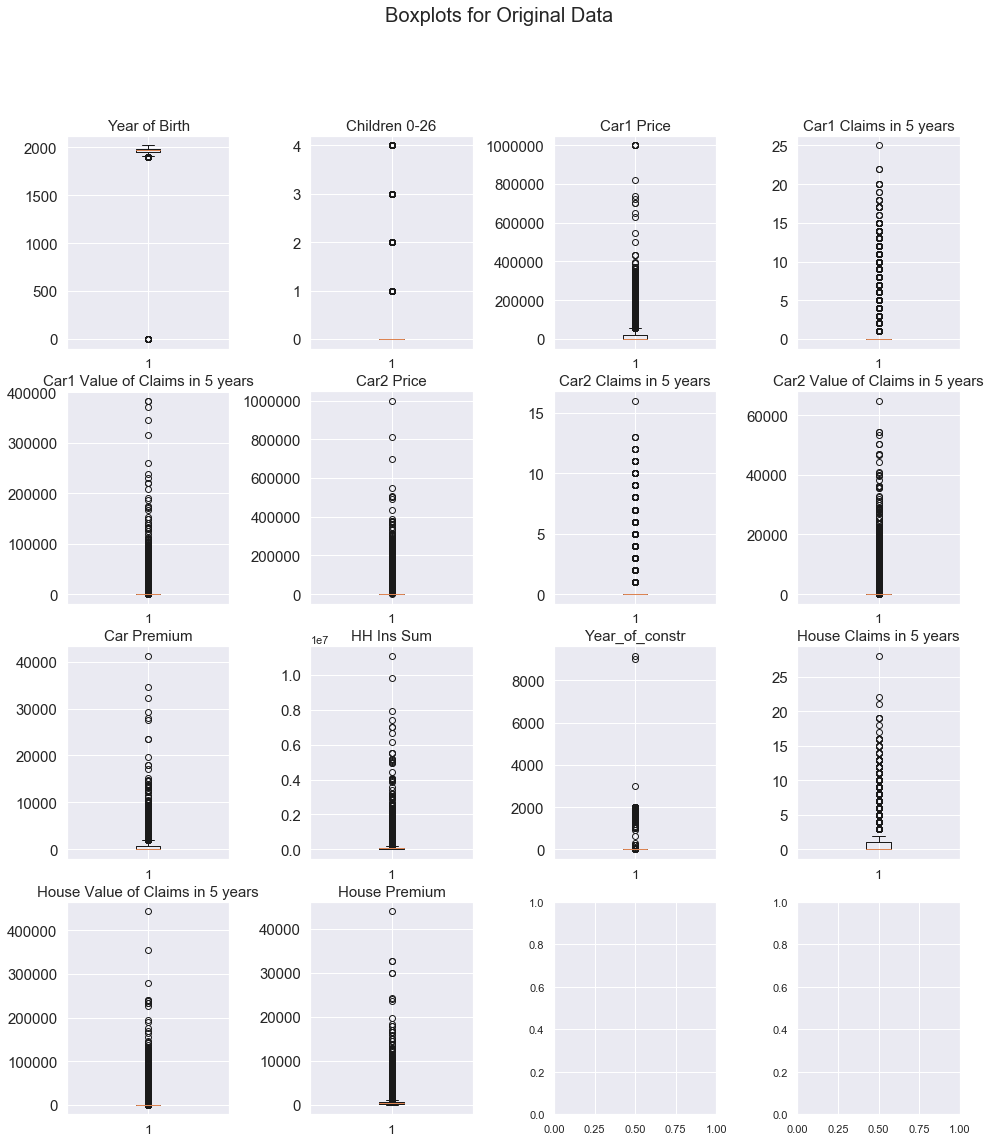

In [12]:
fig, ax = plt.subplots(4,4, figsize=(16,18))
fig.suptitle('Boxplots for Original Data', fontsize=20)
# Year of birth Boxplot
ax[0,0].set_title('Year of Birth', fontsize=15)
ax[0,0].boxplot(dataCities.YearOfBirth)
ax[0,0].tick_params(axis = 'y', which = 'major', labelsize = 15)
ax[0,0].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
# Children Boxplot
ax[0,1].set_title('Children 0-26', fontsize=15)
ax[0,1].boxplot(dataCities['Children_0-26'])
ax[0,1].tick_params(axis = 'y', which = 'major', labelsize = 15)
ax[0,1].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
# Car1 Price
ax[0,2].set_title('Car1 Price', fontsize=15)
ax[0,2].boxplot(dataCities.Car1_Price)
ax[0,2].tick_params(axis = 'y', which = 'major', labelsize = 15)
ax[0,2].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
# Car1Claimsct5y Boxplot
ax[0,3].set_title('Car1 Claims in 5 years', fontsize=15)
ax[0,3].boxplot(dataCities.Car1_ClaimsCt5Y)
ax[0,3].tick_params(axis = 'y', which = 'major', labelsize = 15)
ax[0,3].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
# Car1ClaimsSum5Y Boxplot
ax[1,0].set_title('Car1 Value of Claims in 5 years', fontsize=15)
ax[1,0].boxplot(dataCities.Car1_ClaimsSum5Y)
ax[1,0].tick_params(axis = 'y', which = 'major', labelsize = 15)
ax[1,0].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
# Car2 Price Boxplot
ax[1,1].set_title('Car2 Price', fontsize=15)
ax[1,1].boxplot(dataCities.Car2_Price)
ax[1,1].tick_params(axis = 'y', which = 'major', labelsize = 15)
ax[1,1].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
# Car2ClaimsCt5Y Boxplot
ax[1,2].set_title('Car2 Claims in 5 years', fontsize=15)
ax[1,2].boxplot(dataCities.Car2_ClaimsCt5Y)
ax[1,2].tick_params(axis = 'y', which = 'major', labelsize = 15)
ax[1,2].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
# Car2ClaimsSum5Y Boxplot
ax[1,3].set_title('Car2 Value of Claims in 5 years', fontsize=15)
ax[1,3].boxplot(dataCities.Car2_ClaimsSum5Y)
ax[1,3].tick_params(axis = 'y', which = 'major', labelsize = 15)
ax[1,3].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
# Car Premium Boxplot
ax[2,0].set_title('Car Premium', fontsize=15)
ax[2,0].boxplot(dataCities.Car_Premium)
ax[2,0].tick_params(axis = 'y', which = 'major', labelsize = 15)
ax[2,0].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
# HH_Ins_Sum Boxplot
ax[2,1].set_title('HH Ins Sum', fontsize=15)
ax[2,1].boxplot(dataCities.HH_Ins_Sum)
ax[2,1].tick_params(axis = 'y', which = 'major', labelsize = 15)
ax[2,1].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
# Year_of_constr Boxplot
ax[2,2].set_title('Year_of_constr', fontsize=15)
ax[2,2].boxplot(dataCities.Year_of_constr)
ax[2,2].tick_params(axis = 'y', which = 'major', labelsize = 15)
ax[2,2].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
# HHaB_ClaimsCt5Y Boxplot
ax[2,3].set_title('House Claims in 5 years', fontsize=15)
ax[2,3].boxplot(dataCities.HHaB_ClaimsCt5Y)
ax[2,3].tick_params(axis = 'y', which = 'major', labelsize = 15)
ax[2,3].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
# HHaB_ClaimsSum5Y Boxplot
ax[3,0].set_title('House Value of Claims in 5 years', fontsize=15)
ax[3,0].boxplot(dataCities.HHaB_ClaimsSum5Y)
ax[3,0].tick_params(axis = 'y', which = 'major', labelsize = 15)
ax[3,0].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
# HH_and_Bld_Prem. Boxplot
ax[3,1].set_title('House Premium', fontsize=15)
ax[3,1].boxplot(dataCities['HH_and_Bld_Prem.'])
ax[3,1].tick_params(axis = 'y', which = 'major', labelsize = 15)
ax[3,1].tick_params(axis = 'x', which = 'major', labelsize = 13.5)

plt.subplots_adjust(wspace=0.5)
plt.show()

**Plotting without Considering Zero values**

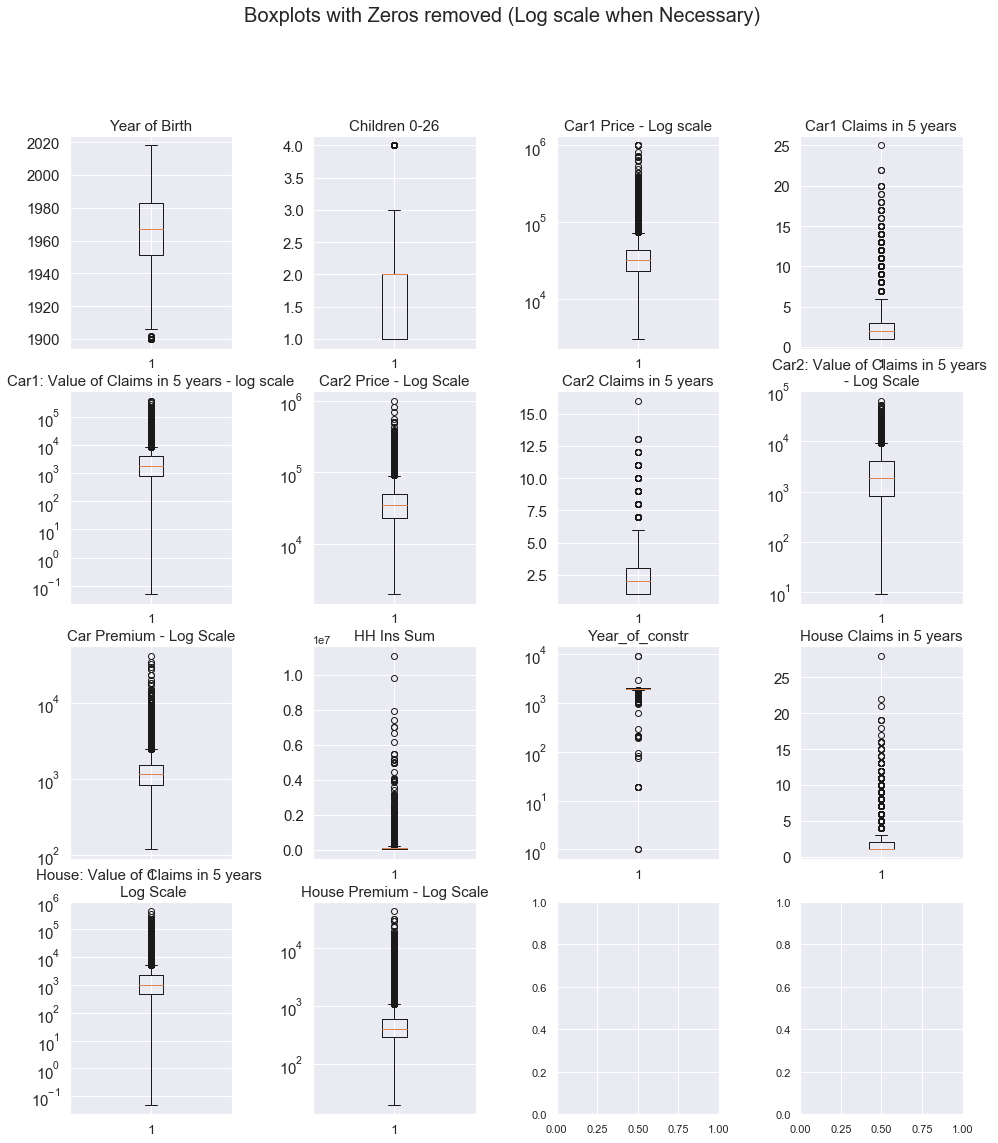

In [13]:
fig, ax = plt.subplots(4,4, figsize=(16,18))
fig.suptitle('Boxplots with Zeros removed (Log scale when Necessary)', fontsize=20)
# Year of birth Boxplot
ax[0,0].set_title('Year of Birth', fontsize=15)
ax[0,0].boxplot(dataCities.YearOfBirth[dataCities.YearOfBirth>0])
ax[0,0].tick_params(axis = 'y', which = 'major', labelsize = 15)
ax[0,0].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
# Children Boxplot
ax[0,1].set_title('Children 0-26', fontsize=15)
ax[0,1].boxplot(dataCities['Children_0-26'][dataCities['Children_0-26']>0])
ax[0,1].tick_params(axis = 'y', which = 'major', labelsize = 15)
ax[0,1].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
# Car1 Price
ax[0,2].set_title('Car1 Price - Log scale', fontsize=15)
ax[0,2].boxplot(dataCities.Car1_Price[dataCities.Car1_Price>0])
ax[0,2].tick_params(axis = 'y', which = 'major', labelsize = 15)
ax[0,2].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
ax[0,2].set_yscale('log')
# Car1Claimsct5y Boxplot
ax[0,3].set_title('Car1 Claims in 5 years', fontsize=15)
ax[0,3].boxplot(dataCities.Car1_ClaimsCt5Y[dataCities.Car1_ClaimsCt5Y>0])
ax[0,3].tick_params(axis = 'y', which = 'major', labelsize = 15)
ax[0,3].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
# Car1ClaimsSum5Y Boxplot
ax[1,0].set_title('Car1: Value of Claims in 5 years - log scale', fontsize=15)
ax[1,0].boxplot(dataCities.Car1_ClaimsSum5Y[dataCities.Car1_ClaimsSum5Y>0])
ax[1,0].tick_params(axis = 'y', which = 'major', labelsize = 15)
ax[1,0].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
ax[1,0].set_yscale('log')
# Car2 Price Boxplot
ax[1,1].set_title('Car2 Price - Log Scale', fontsize=15)
ax[1,1].boxplot(dataCities.Car2_Price[dataCities.Car2_Price>0])
ax[1,1].tick_params(axis = 'y', which = 'major', labelsize = 15)
ax[1,1].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
ax[1,1].set_yscale('log')
# Car2ClaimsCt5Y Boxplot
ax[1,2].set_title('Car2 Claims in 5 years', fontsize=15)
ax[1,2].boxplot(dataCities.Car2_ClaimsCt5Y[dataCities.Car2_ClaimsCt5Y>0])
ax[1,2].tick_params(axis = 'y', which = 'major', labelsize = 15)
ax[1,2].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
# Car2ClaimsSum5Y Boxplot
ax[1,3].set_title('Car2: Value of Claims in 5 years \n- Log Scale', fontsize=15)
ax[1,3].boxplot(dataCities.Car2_ClaimsSum5Y[dataCities.Car2_ClaimsSum5Y>0])
ax[1,3].tick_params(axis = 'y', which = 'major', labelsize = 15)
ax[1,3].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
ax[1,3].set_yscale('log')
# Car Premium Boxplot
ax[2,0].set_title('Car Premium - Log Scale', fontsize=15)
ax[2,0].boxplot(dataCities.Car_Premium[dataCities.Car_Premium>0])
ax[2,0].tick_params(axis = 'y', which = 'major', labelsize = 15)
ax[2,0].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
ax[2,0].set_yscale('log')
# HH_Ins_Sum Boxplot
ax[2,1].set_title('HH Ins Sum', fontsize=15)
ax[2,1].boxplot(dataCities.HH_Ins_Sum[dataCities.HH_Ins_Sum>0])
ax[2,1].tick_params(axis = 'y', which = 'major', labelsize = 15)
ax[2,1].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
# Year_of_constr Boxplot
ax[2,2].set_title('Year_of_constr', fontsize=15)
ax[2,2].boxplot(dataCities.Year_of_constr[dataCities.Year_of_constr>0])
ax[2,2].tick_params(axis = 'y', which = 'major', labelsize = 15)
ax[2,2].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
ax[2,2].set_yscale('log')
# HHaB_ClaimsCt5Y Boxplot
ax[2,3].set_title('House Claims in 5 years', fontsize=15)
ax[2,3].boxplot(dataCities.HHaB_ClaimsCt5Y[dataCities.HHaB_ClaimsCt5Y>0])
ax[2,3].tick_params(axis = 'y', which = 'major', labelsize = 15)
ax[2,3].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
# HHaB_ClaimsSum5Y Boxplot
ax[3,0].set_title('House: Value of Claims in 5 years \n Log Scale', fontsize=15)
ax[3,0].boxplot(dataCities.HHaB_ClaimsSum5Y[dataCities.HHaB_ClaimsSum5Y>0])
ax[3,0].tick_params(axis = 'y', which = 'major', labelsize = 15)
ax[3,0].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
ax[3,0].set_yscale('log')
# HH_and_Bld_Prem. Boxplot
ax[3,1].set_title('House Premium - Log Scale', fontsize=15)
ax[3,1].boxplot(dataCities['HH_and_Bld_Prem.'][dataCities['HH_and_Bld_Prem.']>0])
ax[3,1].tick_params(axis = 'y', which = 'major', labelsize = 15)
ax[3,1].tick_params(axis = 'x', which = 'major', labelsize = 13.5)
ax[3,1].set_yscale('log')
plt.subplots_adjust(wspace=0.5) 
plt.show()

### 4.4. Plotting the Histogram of all Numerical Features

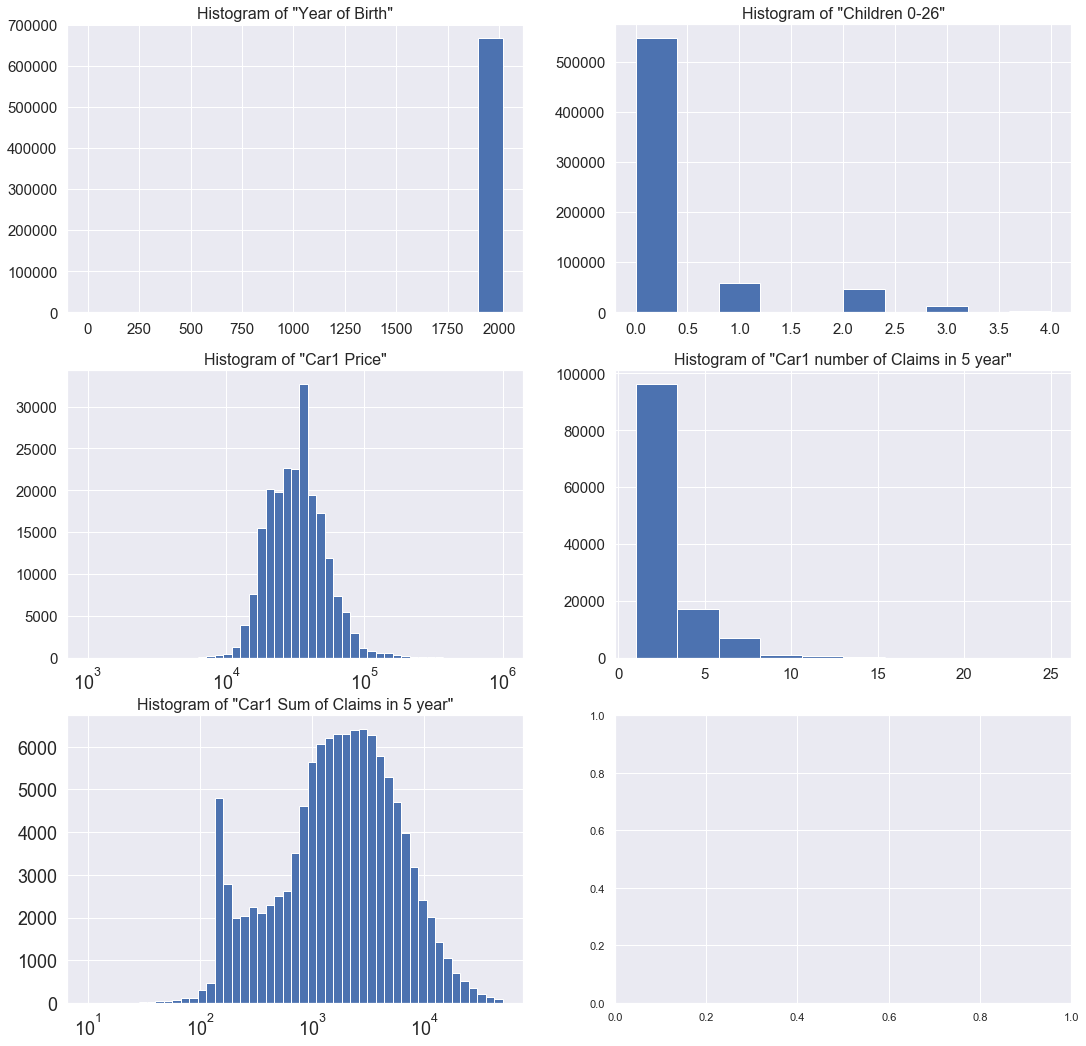

In [14]:
columns = dataCities_r.columns
series_Car1Price = dataCities_r.Car1_Price
series_Car1ClaimsCt = dataCities_r.Car1_ClaimsCt5Y
series_Car1ClaimsSum = dataCities_r.Car1_ClaimsSum5Y
### Plotting the Categorical Features

# Setting visual attributes
sns.set()

# Plotting
fig, axes = plt.subplots(3,2, figsize=(18,18))
# First Histogram
_ = axes[0,0].hist(dataCities_r.YearOfBirth, bins=17)
_ = axes[0,0].set_title('Histogram of "Year of Birth"', fontsize=16)
_ = axes[0,0].tick_params(axis = 'y', which = 'major', labelsize = 15)
_ = axes[0,0].tick_params(axis = 'x', which = 'major', labelsize = 15)
# Second Histogram
_ = axes[0,1].hist(dataCities_r['Children_0-26'])
_ = axes[0,1].set_title('Histogram of "Children 0-26"', fontsize=16)
_ = axes[0,1].tick_params(axis = 'y', which = 'major', labelsize = 15)
_ = axes[0,1].tick_params(axis = 'x', which = 'major', labelsize = 15)
# Third Histogram
_ = axes[1,0].hist(series_Car1Price.where(series_Car1Price>0).dropna(), 
                   bins=np.logspace(np.log10(1000),np.log10(1000000), 50))
_ = axes[1,0].set_xscale("log")
_ = axes[1,0].set_title('Histogram of "Car1 Price"', fontsize=16)
_ = axes[1,0].tick_params(axis = 'y', which = 'major', labelsize = 15)
_ = axes[1,0].tick_params(axis = 'x', which = 'major', labelsize = 18)
# Fourth Histogram
_ = axes[1,1].hist(series_Car1ClaimsCt.where(series_Car1ClaimsCt>0).dropna(),)
                   #bins=np.logspace(np.log10(1),np.log10(30), 20))
#_ = axes[1,1].set_xscale("log")
_ = axes[1,1].set_title('Histogram of "Car1 number of Claims in 5 year"', fontsize=16)
_ = axes[1,1].tick_params(axis = 'y', which = 'major', labelsize = 15)
_ = axes[1,1].tick_params(axis = 'x', which = 'major', labelsize = 15)
# Fifth Histogram
_ = axes[2,0].hist(series_Car1ClaimsSum.where(series_Car1ClaimsSum>0).dropna(),
                   bins=np.logspace(np.log10(10),np.log10(50000), 50))
_ = axes[2,0].set_xscale("log")
_ = axes[2,0].set_title('Histogram of "Car1 Sum of Claims in 5 year"', fontsize=16)
_ = axes[2,0].tick_params(axis = 'y', which = 'major', labelsize = 18)
_ = axes[2,0].tick_params(axis = 'x', which = 'major', labelsize = 18)

## 5. Modifying/Removing Features

### 5.1. Looking into "Year of construction"

In [15]:
np.sort(dataCities_r.Year_of_constr.unique())

array([   0,    1,   19,   73,   80,   94,  190,  197,  200,  207,  210,
        292,  625,  936,  996, 1020, 1032, 1039, 1060, 1085, 1190, 1191,
       1198, 1291, 1300, 1335, 1339, 1350, 1362, 1400, 1411, 1412, 1413,
       1416, 1425, 1437, 1450, 1470, 1475, 1490, 1499, 1500, 1508, 1510,
       1513, 1514, 1515, 1516, 1520, 1534, 1540, 1541, 1548, 1550, 1554,
       1556, 1557, 1559, 1560, 1561, 1563, 1567, 1570, 1576, 1578, 1580,
       1588, 1590, 1592, 1594, 1598, 1599, 1600, 1602, 1603, 1605, 1608,
       1610, 1611, 1613, 1614, 1615, 1616, 1617, 1618, 1620, 1622, 1623,
       1624, 1627, 1628, 1630, 1631, 1632, 1633, 1634, 1635, 1637, 1638,
       1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649,
       1650, 1653, 1654, 1655, 1657, 1659, 1660, 1661, 1662, 1663, 1664,
       1665, 1666, 1667, 1668, 1669, 1670, 1672, 1673, 1675, 1676, 1677,
       1678, 1679, 1680, 1681, 1682, 1684, 1685, 1686, 1688, 1690, 1691,
       1693, 1695, 1697, 1698, 1699, 1700, 1701, 17

**Discussion:**
</br> As we have seen in section `4.1`, almost 88% of values in `Year_of_constr` feature is Zeros (which is not a valid value for year). We can also explore more from above results, and we can see that the rest of non-zero values still contains a lot of invalid values. </br> So, overall we decided to drop this feature.

In [16]:
# Droping Year_of_contr feature
dataCities_r = dataCities_r.drop(columns=['Year_of_constr'])

### 5.2. Looking into 'YearOfBirth' Feature

In [17]:
dataCities_r.YearOfBirth.unique()

array([1948, 1927, 1943, 1928, 1922, 1939, 1926, 1919, 1933, 1932, 1942,
       1946, 1936, 1935, 1934, 1937, 1931, 1923, 1929, 1941, 1940, 1951,
       1944, 1925, 1945, 1920, 1930, 1938, 1959, 1956, 1947, 1949, 2000,
       1921, 1967, 1952, 1954, 1924, 1958, 1915, 1972, 1950, 1962, 1917,
       1918, 1916, 1970, 1953, 1955, 1961, 1913, 1960, 1957, 1965, 1963,
       1964, 1966, 1968, 1969, 1911, 1980, 1974, 1975, 1973, 1971, 1979,
       1976, 1978, 1977, 1982, 1914, 1983, 1900, 1981, 1902, 1906, 1984,
       1985, 1986, 1910, 2002, 1912, 1988, 1992, 1989, 1990, 2013, 1901,
       1987, 1991, 1908, 1993, 1994, 1909, 2016, 1998, 2003, 2007, 1995,
          0, 2008, 1997, 1996, 1999, 2009, 2012, 2010, 1907, 2004, 2001,
       2005, 2006, 2015, 2011, 2017, 2014, 2018], dtype=int64)

In [18]:
print('Number of records in YearOfBirth with zero values: {}'.format(np.sum(dataCities_r.YearOfBirth==0)))

Number of records in YearOfBirth with zero values: 18


**Discussion:**
Clearly, having values with zeros doesn't make sense. But since We have only `18` datapoints with 0 values, we can easily drop those from our . So, we will drop them.

In [19]:
dataCities_r = dataCities_r[dataCities_r.YearOfBirth!=0]

### 5.3. Looking into "Car2_ClaimsSum5Y" and "Car2_ClaimsCt5Y" Features
</br>From section `4.1`, we have seen that almost `99.2%` of the values are equal to zero. This means that there is almost no information in these features for prediction. So, we have decided to drop these columns.

In [20]:
# Dropping "Car2_ClaimsSum5Y" and "Car2_ClaimsCt5Y"
dataCities_r = dataCities_r.drop(columns=['Car2_ClaimsSum5Y', 'Car2_ClaimsCt5Y'])

### 5.4. Looking into "Rooms" Feature
</br>From section `4.1` and `4.2` we can see that almost `50%` of the datapoints in this feature is unknown. Dropping these unknown values are not possible since we need to drop half of the data. Also, replacing these unknown values with any predictive models, would not yield a satisfactory result, because of high fraction of missing data. So, we have decided to remove this feature, too.

In [21]:
dataCities_r = dataCities_r.drop(columns=['Rooms'])

### 5.5. Looking into 'Nations' Feature

In [22]:
print('Number of unique values in Nations: {} \nAnd Unique values are {}'
      .format(pd.unique(dataCities_r.Nation).shape[0],pd.unique(dataCities_r.Nation)))

Number of unique values in Nations: 189 
And Unique values are ['CH ' 'IT ' 'unknown' 'SV ' 'TR ' 'DE ' 'AT ' 'ES ' 'TN ' 'LK ' 'MK '
 'RS ' 'PT ' 'BA ' 'IR ' 'HR ' 'VN ' 'TH ' 'XK ' 'GR ' 'CN ' 'NL ' 'FR '
 'SE ' 'JP ' 'LI ' 'PH ' 'AL ' 'ME ' 'BZ ' 'PL ' 'IN ' 'DK ' 'NO ' 'OM '
 'FI ' 'GB ' 'GH ' 'HU ' 'AR ' 'US ' 'EG ' 'BG ' 'PE ' 'MA ' 'LU ' 'CA '
 'LY ' 'MY ' 'CL ' 'CZ ' 'AU ' 'SK ' 'SI ' 'DZ ' 'BR ' 'XX ' 'RU ' 'KH '
 'CG ' 'BE ' 'EC ' 'RO ' 'LB ' 'UY ' 'SA ' 'ET ' 'MT ' 'PY ' 'KR ' 'IL '
 'PK ' 'ZA ' 'GM ' 'MU ' 'IE ' 'SN ' 'AO ' 'BD ' 'JM ' 'SD ' 'HT ' 'IQ '
 'PR ' 'ID ' 'KP ' 'MG ' 'ML ' 'CO ' 'CI ' 'BH ' 'AM ' 'FO ' 'NI ' 'BO '
 'BY ' 'AF ' 'VE ' 'ER ' 'MX ' 'HK ' 'CU ' 'VG ' 'CF ' 'SO ' 'LA ' 'DO '
 'NP ' 'NZ ' 'TG ' 'BS ' 'SR ' 'CV ' 'GA ' 'KE ' 'HN ' 'GN ' 'MW ' 'CD '
 'SY ' 'CY ' 'SZ ' 'CM ' 'UA ' 'NG ' 'KW ' 'BW ' 'AD ' 'JO ' 'TZ ' 'XO '
 'LV ' 'CR ' 'GT ' 'AE ' 'BM ' 'GF ' 'BI ' 'RW ' 'MS ' 'SL ' 'LT ' 'KZ '
 'PA ' 'BJ ' 'LR ' 'TI ' 'UG ' 'TD ' 'TK ' 'GY ' 'EE ' 'SG ' 'A

In [23]:
df_try = dataCities_r.copy()
pd.unique(df_try.Nation)

array(['CH ', 'IT ', 'unknown', 'SV ', 'TR ', 'DE ', 'AT ', 'ES ', 'TN ',
       'LK ', 'MK ', 'RS ', 'PT ', 'BA ', 'IR ', 'HR ', 'VN ', 'TH ',
       'XK ', 'GR ', 'CN ', 'NL ', 'FR ', 'SE ', 'JP ', 'LI ', 'PH ',
       'AL ', 'ME ', 'BZ ', 'PL ', 'IN ', 'DK ', 'NO ', 'OM ', 'FI ',
       'GB ', 'GH ', 'HU ', 'AR ', 'US ', 'EG ', 'BG ', 'PE ', 'MA ',
       'LU ', 'CA ', 'LY ', 'MY ', 'CL ', 'CZ ', 'AU ', 'SK ', 'SI ',
       'DZ ', 'BR ', 'XX ', 'RU ', 'KH ', 'CG ', 'BE ', 'EC ', 'RO ',
       'LB ', 'UY ', 'SA ', 'ET ', 'MT ', 'PY ', 'KR ', 'IL ', 'PK ',
       'ZA ', 'GM ', 'MU ', 'IE ', 'SN ', 'AO ', 'BD ', 'JM ', 'SD ',
       'HT ', 'IQ ', 'PR ', 'ID ', 'KP ', 'MG ', 'ML ', 'CO ', 'CI ',
       'BH ', 'AM ', 'FO ', 'NI ', 'BO ', 'BY ', 'AF ', 'VE ', 'ER ',
       'MX ', 'HK ', 'CU ', 'VG ', 'CF ', 'SO ', 'LA ', 'DO ', 'NP ',
       'NZ ', 'TG ', 'BS ', 'SR ', 'CV ', 'GA ', 'KE ', 'HN ', 'GN ',
       'MW ', 'CD ', 'SY ', 'CY ', 'SZ ', 'CM ', 'UA ', 'NG ', 'KW ',
       'BW ', 'A

</br>By looking into above result, we can see the there are **189** nations, and from section `4.2` we have seen that many of them has almost few values. Keeping all of these values could create problem when we want to binarize these categorical variables. So, by having the result of section `4.2` we only keep the first few nations and will map the rest to `others`.

In [24]:
df_try.head()

,JobState,Civil,YearOfBirth,Gender,Own/Rent,Lang,Nation,Children_0-26,Car1_Price,Car1_ClaimsCt5Y,Car1_ClaimsSum5Y,Car2_Price,Car_Premium,HH_Ins_Sum,Stand_of_furn,Build_Ins_Sum,HHaB_ClaimsCt5Y,HHaB_ClaimsSum5Y,HH_and_Bld_Prem.,Zip,BFS,City
0,employed,Single,1948,W,M,D,CH,0,0,0,0.0,0,0.0,59000,1,0,0,0.0,266.50,5600,4201,Lenzburg
1,pensioner,Widowed,1927,M,M,D,CH,0,0,0,0.0,0,0.0,39000,2,0,3,3167.2,334.10,5600,4201,Lenzburg
2,housewife,Single,1943,W,E,D,CH,0,0,0,0.0,0,0.0,78000,1,0,0,0.0,462.80,5034,4012,Suhr
3,pensioner,Married,1928,M,E,D,CH,0,0,0,0.0,0,0.0,100000,0,0,0,0.0,443.45,5034,4012,Suhr
4,pensioner,Widowed,1922,W,M,D,CH,0,0,0,0.0,0,0.0,19000,0,0,1,0.0,146.15,5600,4201,Lenzburg


In [25]:
nation_list = ['CH ', 'unknown', 'IT ', 'DE ', 'PT ', 'FR ', 'ES ', 'ER ', 'TR ']
# Replacing Nations
dataCities_r.loc[~dataCities_r.Nation.isin(nation_list),"Nation"] = 'others'
pd.unique(dataCities_r.Nation)

array(['CH ', 'IT ', 'unknown', 'others', 'TR ', 'DE ', 'ES ', 'PT ',
       'FR ', 'ER '], dtype=object)

## 6. Handling Missing Values
<br>For handling missing values, we will use generally two different pipelines:
1. Considering a new category 'unknown' when creating dummy variables and also imputing the missing numerical values with the mean
2. Using Predictive models (e.g. Linear Regression) to predict the missing values by having other features.

### 6.1. First Pipeline: imputing numerical values with 'mean' and making new dummy variable for Categorical values

In [26]:
# Making a copy of dataCities for Pipeline 1
dataCities_p1 = dataCities_r.copy()


,JobState,Civil,YearOfBirth,Gender,Own/Rent,Lang,Nation,Children_0-26,Car1_Price,Car1_ClaimsCt5Y,Car1_ClaimsSum5Y,Car2_Price,Car_Premium,HH_Ins_Sum,Stand_of_furn,Build_Ins_Sum,HHaB_ClaimsCt5Y,HHaB_ClaimsSum5Y,HH_and_Bld_Prem.,Zip,BFS,City
49,unknown,unknown,1946,unknown,E,D,unknown,0,0,0,0.0,0,0.0,103000,0,600000,2,11533.45,1020.10,8004,261,Zürich
85,unknown,Married,1956,W,M,D,CH,0,0,0,0.0,0,0.0,21000,0,0,0,0.00,55.80,5200,4095,Brugg
100,unknown,unknown,2000,unknown,E,D,unknown,0,0,0,0.0,0,0.0,0,unknown,821000,0,0.00,416.70,5033,4003,Buchs (SG)
218,unknown,unknown,1951,unknown,E,D,unknown,0,0,0,0.0,0,0.0,275000,0,0,1,0.00,1724.70,5034,4012,Suhr
236,unknown,unknown,1944,unknown,E,D,unknown,0,0,0,0.0,0,0.0,110000,0,0,0,0.00,500.65,5034,4012,Suhr
268,unknown,Married,1933,M,E,D,CH,0,40000,1,1425.3,0,1029.1,0,unknown,0,0,0.00,0.00,5000,4001,Aarau
323,unknown,unknown,1950,unknown,E,D,unknown,0,0,0,0.0,0,0.0,142000,0,0,2,4011.10,681.50,5000,4001,Aarau
347,unknown,unknown,1949,unknown,E,D,unknown,0,0,0,0.0,0,0.0,113000,0,0,4,5267.90,524.70,5034,4012,Suhr
352,unknown,unknown,1926,unknown,M,D,unknown,0,0,0,0.0,0,0.0,188000,0,0,0,0.00,594.55,5000,4001,Aarau
631,unknown,unknown,1930,unknown,E,D,unknown,0,0,0,0.0,0,0.0,159000,2,0,0,0.00,478.30,5033,4003,Buchs (SG)


In [27]:
# Making a list of numerical columns for imputation
num_columns = ['YearOfBirth', 'Children_0-26','Car1_Price','Car1_ClaimsCt5Y',
               'Car1_ClaimsSum5Y','Car2_Price','Car_Premium','HH_Ins_Sum','Stand_of_furn',
               'Build_Ins_Sum','HHaB_ClaimsCt5Y','HHaB_ClaimsSum5Y','HH_and_Bld_Prem.']
# Changing 'unknown' values to NaN for imputation
dataCities_p1[dataCities_p1[num_columns]=='unknown'] = np.nan
# Changing the data type to float
dataCities_p1[num_columns] = dataCities_p1[num_columns].apply(pd.to_numeric, errors='coerce')


In [28]:
from sklearn.preprocessing import Imputer
num_imp = Imputer(missing_values=np.nan, strategy='mean', axis=0)

dataCities_p1[num_columns] = num_imp.fit_transform(dataCities_p1[num_columns])
display(pd.DataFrame(dataCities_p1.isna().sum(axis=0), columns=['Number of NAs']).T)

,JobState,Civil,YearOfBirth,Gender,Own/Rent,Lang,Nation,Children_0-26,Car1_Price,Car1_ClaimsCt5Y,Car1_ClaimsSum5Y,Car2_Price,Car_Premium,HH_Ins_Sum,Stand_of_furn,Build_Ins_Sum,HHaB_ClaimsCt5Y,HHaB_ClaimsSum5Y,HH_and_Bld_Prem.,Zip,BFS,City
Number of NAs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
# Choosing Categorical columns to make dummies
cat_columns=['JobState','Civil','Gender','Own/Rent','Lang','Nation']
# Getting Dummy variables only for categorical columns
dataCities_p1 = pd.concat([pd.get_dummies(dataCities_p1[cat_columns]),
                           dataCities_p1[dataCities_p1.columns.difference(cat_columns)]], axis=1)
# Re-ordeing the columns to move ['Zip','City','BFS'] columns to the end
dataCities_p1 = pd.concat([dataCities_p1[dataCities_p1.columns.difference(['BFS','Zip','City'])],
                           dataCities_p1[['BFS','Zip','City']]],axis=1)
dataCities_p1.head()

,Build_Ins_Sum,Car1_ClaimsCt5Y,Car1_ClaimsSum5Y,Car1_Price,Car2_Price,Car_Premium,Children_0-26,Civil_Divorced,Civil_Married,Civil_Separated,Civil_Single,Civil_Widowed,Civil_unknown,Gender_M,Gender_W,Gender_unknown,HH_Ins_Sum,HH_and_Bld_Prem.,HHaB_ClaimsCt5Y,HHaB_ClaimsSum5Y,JobState_Unemployed,JobState_college student,JobState_employed,JobState_housewife,JobState_independently,JobState_pensioner,JobState_unknown,Lang_D,Lang_F,Lang_I,Nation_CH,Nation_DE,Nation_ER,Nation_ES,Nation_FR,Nation_IT,Nation_PT,Nation_TR,Nation_others,Nation_unknown,Own/Rent_E,Own/Rent_M,Own/Rent_unknown,Stand_of_furn,YearOfBirth,BFS,Zip,City
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0,59000.0,266.50,0.0,0.0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1.0,1948.0,4201,5600,Lenzburg
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,1,0,0,39000.0,334.10,3.0,3167.2,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2.0,1927.0,4201,5600,Lenzburg
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0,78000.0,462.80,0.0,0.0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1.0,1943.0,4012,5034,Suhr
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,100000.0,443.45,0.0,0.0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.0,1928.0,4012,5034,Suhr
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,1,0,19000.0,146.15,1.0,0.0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,1922.0,4201,5600,Lenzburg


### 6.2. Second Approach: Predicting missing values

In [ ]:
# This was not possible, since the missing values were co-occuring

## 7. Predicting with Regression Model

### 7.1. First Pipeline

In [30]:
#Saving dataFrame to csv
#dataCities_p1.to_csv('dataCities_p1.csv')
#Loading from csv
dataCities_p3 = pd.read_csv('dataCities_p1.csv', index_col=0)


,Build_Ins_Sum,Car1_ClaimsCt5Y,Car1_ClaimsSum5Y,Car1_Price,Car2_Price,Car_Premium,Children_0-26,Civil_Divorced,Civil_Married,Civil_Separated,Civil_Single,Civil_Widowed,Civil_unknown,Gender_M,Gender_W,Gender_unknown,HH_Ins_Sum,HH_and_Bld_Prem.,HHaB_ClaimsCt5Y,HHaB_ClaimsSum5Y,JobState_Unemployed,JobState_college student,JobState_employed,JobState_housewife,JobState_independently,JobState_pensioner,JobState_unknown,Lang_D,Lang_F,Lang_I,Nation_CH,Nation_DE,Nation_ER,Nation_ES,Nation_FR,Nation_IT,Nation_PT,Nation_TR,Nation_others,Nation_unknown,Own/Rent_E,Own/Rent_M,Own/Rent_unknown,Stand_of_furn,YearOfBirth,BFS,Zip,City
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0,59000.0,266.50,0.0,0.0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1.0,1948.0,4201,5600,Lenzburg
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,1,0,0,39000.0,334.10,3.0,3167.2,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2.0,1927.0,4201,5600,Lenzburg
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0,78000.0,462.80,0.0,0.0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1.0,1943.0,4012,5034,Suhr
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,100000.0,443.45,0.0,0.0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.0,1928.0,4012,5034,Suhr
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,1,0,19000.0,146.15,1.0,0.0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,1922.0,4201,5600,Lenzburg


In [31]:
# Making a copy of dataframe
#data_p1 = dataCities_p3.copy()
data_p1 = dataCities_p3.iloc[:,:-2]


,Build_Ins_Sum,Car1_ClaimsCt5Y,Car1_ClaimsSum5Y,Car1_Price,Car2_Price,Car_Premium,Children_0-26,Civil_Divorced,Civil_Married,Civil_Separated,Civil_Single,Civil_Widowed,Civil_unknown,Gender_M,Gender_W,Gender_unknown,HH_Ins_Sum,HH_and_Bld_Prem.,HHaB_ClaimsCt5Y,HHaB_ClaimsSum5Y,JobState_Unemployed,JobState_college student,JobState_employed,JobState_housewife,JobState_independently,JobState_pensioner,JobState_unknown,Lang_D,Lang_F,Lang_I,Nation_CH,Nation_DE,Nation_ER,Nation_ES,Nation_FR,Nation_IT,Nation_PT,Nation_TR,Nation_others,Nation_unknown,Own/Rent_E,Own/Rent_M,Own/Rent_unknown,Stand_of_furn,YearOfBirth,BFS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0,59000.0,266.50,0.0,0.0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1.0,1948.0,4201
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,1,0,0,39000.0,334.10,3.0,3167.2,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2.0,1927.0,4201
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0,78000.0,462.80,0.0,0.0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1.0,1943.0,4012
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,100000.0,443.45,0.0,0.0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.0,1928.0,4012
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,1,0,19000.0,146.15,1.0,0.0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,1922.0,4201


In [32]:
# Joining labels to the features
data_p1 = pd.merge(data_p1, swissData_1.iloc[:,np.r_[:1,91:92]],  how='left', left_on=['BFS'], right_on = ['BFS'])


,Build_Ins_Sum,Car1_ClaimsCt5Y,Car1_ClaimsSum5Y,Car1_Price,Car2_Price,Car_Premium,Children_0-26,Civil_Divorced,Civil_Married,Civil_Separated,Civil_Single,Civil_Widowed,Civil_unknown,Gender_M,Gender_W,Gender_unknown,HH_Ins_Sum,HH_and_Bld_Prem.,HHaB_ClaimsCt5Y,HHaB_ClaimsSum5Y,JobState_Unemployed,JobState_college student,JobState_employed,JobState_housewife,JobState_independently,JobState_pensioner,JobState_unknown,Lang_D,Lang_F,Lang_I,Nation_CH,Nation_DE,Nation_ER,Nation_ES,Nation_FR,Nation_IT,Nation_PT,Nation_TR,Nation_others,Nation_unknown,Own/Rent_E,Own/Rent_M,Own/Rent_unknown,Stand_of_furn,YearOfBirth,BFS,trpt1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0,59000.0,266.50,0.0,0.0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1.0,1948.0,4201,6887
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,1,0,0,39000.0,334.10,3.0,3167.2,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2.0,1927.0,4201,6887
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0,78000.0,462.80,0.0,0.0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1.0,1943.0,4012,6154
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,100000.0,443.45,0.0,0.0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.0,1928.0,4012,6154
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,1,0,19000.0,146.15,1.0,0.0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,1922.0,4201,6887


In [33]:
# Splitting dataset into features "x" and labels "y"
x = data_p1.iloc[:,:-2]
y = data_p1.iloc[:,46:47]


,Build_Ins_Sum,Car1_ClaimsCt5Y,Car1_ClaimsSum5Y,Car1_Price,Car2_Price,Car_Premium,Children_0-26,Civil_Divorced,Civil_Married,Civil_Separated,Civil_Single,Civil_Widowed,Civil_unknown,Gender_M,Gender_W,Gender_unknown,HH_Ins_Sum,HH_and_Bld_Prem.,HHaB_ClaimsCt5Y,HHaB_ClaimsSum5Y,JobState_Unemployed,JobState_college student,JobState_employed,JobState_housewife,JobState_independently,JobState_pensioner,JobState_unknown,Lang_D,Lang_F,Lang_I,Nation_CH,Nation_DE,Nation_ER,Nation_ES,Nation_FR,Nation_IT,Nation_PT,Nation_TR,Nation_others,Nation_unknown,Own/Rent_E,Own/Rent_M,Own/Rent_unknown,Stand_of_furn,YearOfBirth
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0,59000.0,266.50,0.0,0.0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1.0,1948.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,1,0,0,39000.0,334.10,3.0,3167.2,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,2.0,1927.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0,78000.0,462.80,0.0,0.0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1.0,1943.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,100000.0,443.45,0.0,0.0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.0,1928.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,1,0,19000.0,146.15,1.0,0.0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,1922.0


,trpt1
0,6887
1,6887
2,6154
3,6154
4,6887


In [34]:
from sklearn.preprocessing import StandardScaler
# Standardizing data
p1_std = StandardScaler()

p1_std.fit(x)

x = p1_std.transform(x)


In [35]:
from sklearn.decomposition import PCA
# Dimentionality reduction
p1_pca = PCA(n_components=20)
p1_pca.fit(x)
x = p1_pca.transform(x)
x[(x>-1e-10)&(x<1e-10)]=0

In [36]:
from sklearn.linear_model import RidgeCV
# Fitting the model
p1_clf = RidgeCV(alphas=[1e-2, 1e-1,1.0], fit_intercept=True, cv=5)
p1_clf.fit(x,y)

RidgeCV(alphas=[0.01, 0.1, 1.0], cv=5, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [ ]:
# Predicting the Scores
p1_clf.score(x,y)

### Droping all the values unknown

In [ ]:
#Born_after_2003 = dataCities_r.loc[dataCities_r['YearOfBirth'] >= 2003]
# By looking into datapoints, we see that most on datapoints which have 'YearOfBirth' larger than 2003...
# ... contains unknown values for most of the features, so we drop 
dataCities_e = dataCities_r.loc[dataCities_r['YearOfBirth'] < 2003] 
Born_after_2003_s = Born_after_2003.loc[Born_after_2003['Own/Rent'] != 'unknown'] 
dataCities_r = pd.concat([dataCities_e,Born_after_2003_s])

In [52]:
df = dataCities_r.loc[dataCities_r['JobState'] != 'unknown']
df = df.loc[df['Gender'] != 'unknown']
df = df.loc[df['Civil'] != 'unknown']
df = df.loc[df['Nation'] != 'unknown']
df = df.loc[df['Own/Rent'] != 'unknown']

len(df)/len(dataCities_r)

0.8566015420315892

#### The unknown values only represent 12% of the data-set



### 6.3. Third Approach: Replace all the category by numerical values

### Features to remove: 

#### Year_of_constr : Almost all the rows are 0 we remove this feature
#### Stand_of_furn : too many 'unknown'
#### Rooms : unrelevant
#### City : We already have ZIP code
#### ZIP (not  Zip) : appear 2 times 

In [ ]:
df = df.drop('Year_of_constr',axis = 1)
df = df.drop('Rooms',axis = 1)
df = df.drop('City', axis = 1)
df = df.drop('ZIP',axis = 1)
#df = df.drop('Stand_of_furn',axis = 1)



#### Replace Feature Nation by boolean feature: Swiss or not Swiss

In [57]:
df['Swiss'] = np.nan
df['Swiss'] = df['Nation'].apply( lambda x : 1 if x == 'CH ' else 0)
df = df.drop('Nation',axis = 1)

### Replace job state Civil, gender Own/Rent and Land by numerical values 

In [58]:
List_job = df['JobState'].unique().tolist()
df['JobState'] = df['JobState'].apply( lambda x : List_job.index(x))

List_civil = df['Civil'].unique().tolist()
df['Civil'] = df['Civil'].apply( lambda x : List_civil.index(x))

List_Gender = df['Gender'].unique().tolist()
df['Gender'] = df['Gender'].apply( lambda x : List_Gender.index(x))


List_Own_Rent = df['Own/Rent'].unique().tolist()
df['Own/Rent'] = df['Own/Rent'].apply( lambda x : List_Own_Rent.index(x))

List_Lang = df['Lang'].unique().tolist()
df['Lang'] = df['Lang'].apply( lambda x : List_Lang.index(x))

In [ ]:
df.head(20)

# Saving the dataset with the selected feartures.

In [60]:
df.to_csv(DATA_PATH + "dataCities_r.csv")

In [ ]:
dataCities =  pd.read_csv(DATA_PATH + "dataCities_r.csv", encoding = "ISO-8859-1"  , index_col = 0)
# Load data including all the indicators
swissData_1 =  pd.read_excel(DATA_PATH + "swissdata.xlsx", encoding = "ISO-8859-1", sheet_name='Sheet1')

# Running Prediction Models#

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from IPython.core.display import display, HTML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from sklearn import datasets, linear_model
import random
import numpy
from matplotlib import pyplot

DATA_PATH = "data/"

In [2]:
dataCities =  pd.read_csv(DATA_PATH + "dataCities_r.csv", encoding = "ISO-8859-1"  , index_col = 0)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
swissData_1 =  pd.read_excel(DATA_PATH + "swissdata.xlsx", encoding = "ISO-8859-1", sheet_name='Sheet1')
swissData_1.head()

,trpt1,trpt2,trpt3,trpt4,trpt5,trpt6,trpt7,trpt8,trpt9,trpt10,...,fin6,fin7,fin8,fin9,egmt1,egmt2,egmt3,egmt4,BFS,City
0,13967,10910,1113,324,55,230,1141,518.6347,10074.017096,3890.903624,...,36490.30509,21671.31863,153075.31682,72145.60105,9822,1993,401,937,4001,Aarau
1,11081,8922,391,73,16,38,1554,476.0431,8406.800437,3798.733012,...,15513.44951,5184.87797,132758.41594,81456.89070,1947,1947,437,1100,131,Adliswil
2,7382,5716,590,60,55,84,815,561.2726,4177.282833,1518.951616,...,7471.43556,5688.68890,44084.50934,26033.32006,1618,1618,271,964,2761,Aesch (BL)
3,7746,6088,394,124,111,181,761,511.5966,5288.467593,1968.095881,...,23496.12834,1904.26783,97258.78071,37741.38660,1145,1145,218,634,2,Affoltern am Albis
4,6399,5064,450,74,98,50,550,508.3827,3672.713852,1201.705917,...,1944.34885,1914.69312,43537.08753,20379.09681,2303,1355,249,723,5401,Aigle


In [4]:
dataCities.head()

,JobState,Civil,YearOfBirth,Gender,Own/Rent,Lang,Children_0-26,Car1_Price,Car1_ClaimsCt5Y,Car1_ClaimsSum5Y,...,HH_Ins_Sum,Stand_of_furn,Build_Ins_Sum,HHaB_ClaimsCt5Y,HHaB_ClaimsSum5Y,HH_and_Bld_Prem.,Zip,BFS,City,Swiss
0,0,0,1948,0,0,0,0,0,0,0.0,...,59000,1,0,0,0.0,266.50,5600,4201,Lenzburg,1
1,1,1,1927,1,0,0,0,0,0,0.0,...,39000,2,0,3,3167.2,334.10,5600,4201,Lenzburg,1
2,2,0,1943,0,1,0,0,0,0,0.0,...,78000,1,0,0,0.0,462.80,5034,4012,Suhr,1
3,1,2,1928,1,1,0,0,0,0,0.0,...,100000,0,0,0,0.0,443.45,5034,4012,Suhr,1
4,1,1,1922,0,0,0,0,0,0,0.0,...,19000,0,0,1,0.0,146.15,5600,4201,Lenzburg,1


In [5]:
# Loading datasets
swissData_1 =  pd.read_excel(DATA_PATH + "swissdata.xlsx", encoding = "ISO-8859-1", sheet_name='Sheet1')
swissData_2 =  pd.read_excel(DATA_PATH + "swissdata.xlsx", encoding = "ISO-8859-1", sheet_name="Sheet2")
dataCities =  pd.read_csv(DATA_PATH + "dataCities_r.csv", encoding = "ISO-8859-1"  , index_col = 0)



C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
swissData_1_ = swissData_1

#replacing special characters (encoding error)
dataCities['City'] = dataCities['City'].str.replace('Ã¼','ü')
dataCities['City'] = dataCities['City'].str.replace('Ã¶','ö')
dataCities['City'] = dataCities['City'].str.replace('Ã´','ô')
dataCities['City'] = dataCities['City'].str.replace('Ã¢','â')
dataCities['City'] = dataCities['City'].str.replace('Ã¤','ä')
dataCities['City'] = dataCities['City'].str.replace('Ã©','é')
dataCities['City'] = dataCities['City'].str.replace('Ãª','ê')
dataCities['City'] = dataCities['City'].str.replace('Ã¨','è')

In [7]:

# Cleaning the data
swissData_2 = swissData_2.reset_index().drop(['level_0','level_1'], axis=1).set_index('n1').sort_values('n1')


df = pd.merge(dataCities, swissData_1, on=['City'])

#droping unused columns
df = df.drop('BFS_x',axis = 1)
df = df.drop('BFS_y',axis = 1)
df = df.drop('Zip',axis = 1)
df = df.drop('Stand_of_furn',axis = 1)

#Convert to numerical value
df = df.convert_objects(convert_numeric=True)

#Drop Not a Number
#df = df.dropna()

df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()


,JobState,Civil,YearOfBirth,Gender,Own/Rent,Lang,Children_0-26,Car1_Price,Car1_ClaimsCt5Y,Car1_ClaimsSum5Y,...,fin4,fin5,fin6,fin7,fin8,fin9,egmt1,egmt2,egmt3,egmt4
0,0,0,1948,0,0,0,0,0,0,0.0,...,10693.19694,59049.66513,4840.0122,3936.32513,64842.30177,32105.3961,3707,1092,186,406
1,1,1,1927,1,0,0,0,0,0,0.0,...,10693.19694,59049.66513,4840.0122,3936.32513,64842.30177,32105.3961,3707,1092,186,406
2,1,1,1922,0,0,0,0,0,0,0.0,...,10693.19694,59049.66513,4840.0122,3936.32513,64842.30177,32105.3961,3707,1092,186,406
3,1,2,1932,1,1,0,0,0,0,0.0,...,10693.19694,59049.66513,4840.0122,3936.32513,64842.30177,32105.3961,3707,1092,186,406
4,1,2,1937,1,1,0,0,0,0,0.0,...,10693.19694,59049.66513,4840.0122,3936.32513,64842.30177,32105.3961,3707,1092,186,406


In [8]:
data_with_pop1 = df
data_with_pop1['CityClass']=data_with_pop1['pop1']
data_with_pop1 = data_with_pop1.sort_values('CityClass')

In [9]:
#function to create the classes

num_cities_per_class = 2 

def split_in_two(idx,x,value):
    if(x == value):
        return idx // num_cities_per_class
    else:
        return x

list_ = data_with_pop1['CityClass'].unique()
idx = 0
#updating CityClass column to the right values (class number)
for value in list_:
    idx = idx + 1
    data_with_pop1['CityClass'] = data_with_pop1['CityClass'].apply(lambda x :split_in_two(idx,x,value))

data_with_pop1['CityClass'].unique()


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85], dtype=int64)

Converting pop to class from 1 to 10

### Prediction using MLRegressor

In [11]:
all_predictions_per_class = []
each_classes = []

for j in range (1, 85):
    X_Class = data_with_pop1[data_with_pop1['CityClass']== j]
    X_Class = X_Class.drop('City',axis = 1)
    X_Class = X_Class.dropna()
    X = X_Class.iloc[:,0:18]
    X = preprocessing.scale(X)
    for i in range(50,70):
        y = X_Class.iloc[:,i]
        y = preprocessing.scale(y)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
        nn = MLPRegressor(activation='logistic',
                                           solver='adam',
                                           learning_rate='adaptive',
                                           max_iter=2000,
                                           learning_rate_init=0.01,
                                           alpha=0.01)
        n = nn.fit(X_train,y_train)
        result = n.score(X_test,y_test)
        all_predictions_per_class.append(result)
    each_classes.append(all_predictions_per_class[:])
    all_predictions_per_class.clear()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [12]:
col = X_Class.columns.values[50:70]


In [13]:
#result stored in dataframe
df_ = pd.DataFrame(np.array(each_classes).reshape(84,20), columns = col)
df_.head()

,pop22,pop23,pop24,pop25,pop26,pop27,pop28,pop29,pop30,trv1,trv2,trv3,trv4,trv5,trv6,trv7,trv8,trv9,trv10,trv11
0,0.738339,0.729094,0.747764,0.730552,0.733326,0.739298,0.739113,0.737336,0.733095,0.745157,0.743481,0.743835,0.742948,0.740509,0.730696,0.734649,0.741370,0.734072,0.744242,0.739637
1,0.003017,0.013307,0.009095,-0.015405,-0.012650,0.014189,0.012246,-0.005975,-0.017496,-0.004895,0.006298,0.008219,0.015406,0.021468,-0.018519,0.000000,0.006577,0.016831,0.008477,0.021592
2,0.969056,0.971509,0.971415,0.969755,0.971767,0.967867,0.968096,0.970590,0.962563,0.967869,0.965576,0.971166,0.971260,0.967332,0.970518,0.000000,0.969281,0.970841,0.970572,0.964502
3,-0.008072,0.002055,0.000268,0.034274,0.001228,-0.144408,0.007047,-0.032100,-0.085057,0.010727,0.007862,-0.001379,0.008677,-0.009216,0.000922,0.021131,-0.039425,-0.042041,0.022454,-0.064711
4,0.989714,0.990837,0.989632,0.988985,0.988619,0.991461,0.991487,0.990215,0.992356,0.991558,0.991939,0.987285,0.991335,0.991801,0.991497,0.991593,0.987109,0.990396,0.986272,0.990192


In [14]:
df_.describe()

,pop22,pop23,pop24,pop25,pop26,pop27,pop28,pop29,pop30,trv1,trv2,trv3,trv4,trv5,trv6,trv7,trv8,trv9,trv10,trv11
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,0.451460,0.440809,0.452050,0.450549,0.453570,0.447920,0.449082,0.452602,0.452312,0.452225,0.448139,0.450517,0.450674,0.447190,0.452490,0.368349,0.451160,0.452728,0.454354,0.451401
std,0.438699,0.437404,0.438340,0.439575,0.436893,0.442118,0.439665,0.436471,0.437682,0.436465,0.439118,0.437296,0.438016,0.440716,0.436609,0.434089,0.439538,0.435126,0.435962,0.438295
min,-0.034587,-0.032901,-0.065107,-0.090440,-0.057475,-0.144408,-0.043296,-0.101004,-0.085057,-0.011469,-0.036894,-0.037277,-0.028385,-0.041675,-0.036262,-0.019938,-0.102913,-0.042041,-0.047530,-0.064711
25%,0.035251,0.038413,0.040647,0.035430,0.040397,0.029762,0.031775,0.040852,0.044231,0.034433,0.029460,0.037167,0.036593,0.030466,0.036506,0.000000,0.029037,0.039882,0.033027,0.036630
50%,0.128384,0.135946,0.133323,0.141147,0.154581,0.138833,0.149731,0.164275,0.147610,0.129495,0.144699,0.143805,0.136663,0.146202,0.139544,0.063627,0.168281,0.168291,0.148189,0.172983
75%,0.923833,0.922229,0.925478,0.925394,0.924259,0.924514,0.924324,0.922722,0.923748,0.923420,0.925183,0.924671,0.924543,0.924843,0.923686,0.919574,0.925205,0.924778,0.923558,0.924248
max,0.992302,0.993045,0.993461,0.993156,0.992890,0.992741,0.993173,0.992818,0.993608,0.993180,0.993564,0.993415,0.993193,0.993021,0.993291,0.991625,0.992832,0.992275,0.993283,0.993719


In [15]:
df_.to_csv('data/prediction_results_50to70_mlregressor.csv', index=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025D81567780>]],
      dtype=object)

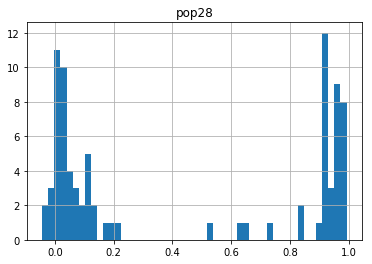

In [16]:

df_.hist(column='pop28', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025D8145AC88>]],
      dtype=object)

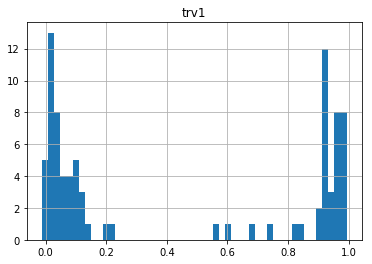

In [17]:
df_.hist(column='trv1', bins=50)

### Predictions using Ridge

In [33]:
all_predictions_per_class = []
each_classes_ridg = []

for j in range (1, 85):
    X_Class = data_with_pop1[data_with_pop1['CityClass']== j]
    X_Class = X_Class.drop('City',axis = 1)
    X_Class = X_Class.dropna()
    X = X_Class.iloc[:,0:18]
    X = preprocessing.scale(X)   
    for i in range(50,70):
        y = X_Class.iloc[:,i]
        y = preprocessing.scale(y)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

        clf = Ridge(alpha=0.1)
        clf.fit(X_train,y_train)

        result = clf.score(X_test,y_test)
        all_predictions_per_class.append(result)
    each_classes_ridg.append(all_predictions_per_class[:])
    all_predictions_per_class.clear()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [34]:
df_ridge = pd.DataFrame(np.array(each_classes).reshape(84,20), columns = col)
df_ridge.head()

,pop22,pop23,pop24,pop25,pop26,pop27,pop28,pop29,pop30,trv1,trv2,trv3,trv4,trv5,trv6,trv7,trv8,trv9,trv10,trv11
0,0.728847,0.728847,0.728847,0.728847,0.728847,0.728847,0.728847,0.728847,0.728847,0.728847,0.728847,0.728847,0.728847,0.728847,0.728847,0.728847,0.728847,0.728847,0.728847,0.728847
1,0.012882,0.012882,0.012882,0.012882,0.012882,0.012882,0.012882,0.012882,0.012882,0.012882,0.012882,0.012882,0.012882,0.012882,0.012882,1.000000,0.012882,0.012882,0.012882,0.012882
2,0.964688,0.964688,0.964688,0.964688,0.964688,0.964688,0.964688,0.964688,0.964688,0.964688,0.964688,0.964688,0.964688,0.964688,0.964688,1.000000,0.964688,0.964688,0.964688,0.964688
3,-0.105301,-0.105301,-0.105301,-0.105301,-0.105301,-0.105301,-0.105301,-0.105301,-0.105301,-0.105301,-0.105301,-0.105301,-0.105301,-0.105301,-0.105301,-0.105301,-0.105301,-0.105301,-0.105301,-0.105301
4,0.992633,0.992633,0.992633,0.992633,0.992633,0.992633,0.992633,0.992633,0.992633,0.992633,0.992633,0.992633,0.992633,0.992633,0.992633,0.992633,0.992633,0.992633,0.992633,0.992633


In [35]:
df_ridge.describe()

,pop22,pop23,pop24,pop25,pop26,pop27,pop28,pop29,pop30,trv1,trv2,trv3,trv4,trv5,trv6,trv7,trv8,trv9,trv10,trv11
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,0.446537,0.457632,0.446537,0.446537,0.446537,0.458089,0.446537,0.446537,0.446537,0.446537,0.446537,0.446537,0.446537,0.446537,0.446537,0.604723,0.458268,0.446537,0.446537,0.446537
std,0.442067,0.444690,0.442067,0.442067,0.442067,0.443718,0.442067,0.442067,0.442067,0.442067,0.442067,0.442067,0.442067,0.442067,0.442067,0.444527,0.443539,0.442067,0.442067,0.442067
min,-0.200762,-0.200762,-0.200762,-0.200762,-0.200762,-0.200762,-0.200762,-0.200762,-0.200762,-0.200762,-0.200762,-0.200762,-0.200762,-0.200762,-0.200762,-0.171479,-0.200762,-0.200762,-0.200762,-0.200762
25%,0.034655,0.034655,0.034655,0.034655,0.034655,0.039261,0.034655,0.034655,0.034655,0.034655,0.034655,0.034655,0.034655,0.034655,0.034655,0.067248,0.039261,0.034655,0.034655,0.034655
50%,0.143477,0.175782,0.143477,0.143477,0.143477,0.175782,0.143477,0.143477,0.143477,0.143477,0.143477,0.143477,0.143477,0.143477,0.143477,0.918504,0.175782,0.143477,0.143477,0.143477
75%,0.924821,0.929660,0.924821,0.924821,0.924821,0.929660,0.924821,0.924821,0.924821,0.924821,0.924821,0.924821,0.924821,0.924821,0.924821,0.992943,0.929660,0.924821,0.924821,0.924821
max,0.993871,1.000000,0.993871,0.993871,0.993871,1.000000,0.993871,0.993871,0.993871,0.993871,0.993871,0.993871,0.993871,0.993871,0.993871,1.000000,1.000000,0.993871,0.993871,0.993871


In [36]:
df_ridge.to_csv('data/prediction_results_50to70_ridge.csv', index=False)

### Predictions using LinearRegression

In [37]:
all_predictions_per_class = []
each_classes_linear = []

for j in range (1, 85):
    X_Class = data_with_pop1[data_with_pop1['CityClass']== j]
    X_Class = X_Class.drop('City',axis = 1)
    X_Class = X_Class.dropna()
    X = X_Class.iloc[:,0:18]
    X = preprocessing.scale(X)

    for i in range(50,70):
        y = X_Class.iloc[:,i]
        y = preprocessing.scale(y)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
        nn = MLPRegressor(activation='logistic',
                                           solver='adam',
                                           learning_rate='adaptive',
                                           max_iter=2000,
                                           learning_rate_init=0.01,
                                           alpha=0.01)
        
        regr = linear_model.LinearRegression()
        regr.fit(X_train, y_train)

        result = regr.score(X_test,y_test)
        all_predictions_per_class.append(result)
        
    each_classes_linear.append(all_predictions_per_class[:])
    all_predictions_per_class.clear()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [38]:
df_linear = pd.DataFrame(np.array(each_classes_linear).reshape(84,20), columns = col)


In [39]:
df_linear.describe()

,pop22,pop23,pop24,pop25,pop26,pop27,pop28,pop29,pop30,trv1,trv2,trv3,trv4,trv5,trv6,trv7,trv8,trv9,trv10,trv11
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,0.446537,0.457632,0.446537,0.446537,0.446537,0.458089,0.446537,0.446537,0.446537,0.446537,0.446537,0.446537,0.446537,0.446537,0.446537,0.604723,0.458268,0.446537,0.446537,0.446537
std,0.442067,0.444690,0.442067,0.442067,0.442067,0.443718,0.442067,0.442067,0.442067,0.442067,0.442067,0.442067,0.442067,0.442067,0.442067,0.444527,0.443539,0.442067,0.442067,0.442067
min,-0.200762,-0.200762,-0.200762,-0.200762,-0.200762,-0.200762,-0.200762,-0.200762,-0.200762,-0.200762,-0.200762,-0.200762,-0.200762,-0.200762,-0.200762,-0.171479,-0.200762,-0.200762,-0.200762,-0.200762
25%,0.034655,0.034655,0.034655,0.034655,0.034655,0.039261,0.034655,0.034655,0.034655,0.034655,0.034655,0.034655,0.034655,0.034655,0.034655,0.067248,0.039261,0.034655,0.034655,0.034655
50%,0.143477,0.175782,0.143477,0.143477,0.143477,0.175782,0.143477,0.143477,0.143477,0.143477,0.143477,0.143477,0.143477,0.143477,0.143477,0.918504,0.175782,0.143477,0.143477,0.143477
75%,0.924821,0.929660,0.924821,0.924821,0.924821,0.929660,0.924821,0.924821,0.924821,0.924821,0.924821,0.924821,0.924821,0.924821,0.924821,0.992943,0.929660,0.924821,0.924821,0.924821
max,0.993871,1.000000,0.993871,0.993871,0.993871,1.000000,0.993871,0.993871,0.993871,0.993871,0.993871,0.993871,0.993871,0.993871,0.993871,1.000000,1.000000,0.993871,0.993871,0.993871


In [40]:
df_linear.to_csv('data/prediction_results_50to70_linear.csv', index=False)

In [41]:
list_ = df_.mean().values

In [42]:
list_ridge = df_ridge.mean().values

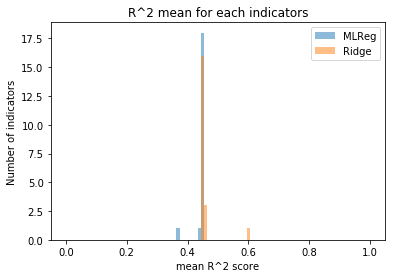

In [48]:
x = list_
y = list_ridge

bins = numpy.linspace(0, 1, 100)

pyplot.hist(x, bins, alpha=0.5, label='MLReg')
pyplot.hist(y, bins, alpha=0.5, label='Ridge')
pyplot.legend(loc='upper right')
pyplot.title('R^2 mean for each indicators')
pyplot.xlabel("mean R^2 score")
pyplot.ylabel("Number of indicators")
pyplot.show()

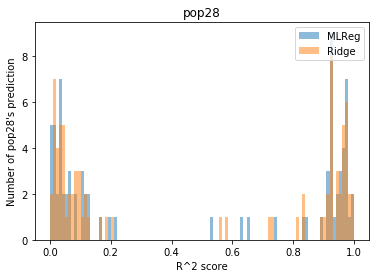

In [44]:
x = df_['pop28']
y = df_ridge['pop28']

bins = numpy.linspace(0, 1, 100)
pyplot.title('pop28')
pyplot.hist(x, bins, alpha=0.5, label='MLReg')
pyplot.hist(y, bins, alpha=0.5, label='Ridge')
pyplot.xlabel("R^2 score")
pyplot.ylabel("Number of pop28's prediction")
pyplot.legend(loc='upper right')
pyplot.show()

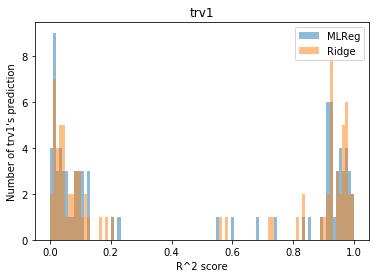

In [45]:
x = df_['trv1']
y = df_ridge['trv1']

bins = numpy.linspace(0, 1, 100)
pyplot.title('trv1')
pyplot.hist(x, bins, alpha=0.5, label='MLReg')
pyplot.hist(y, bins, alpha=0.5, label='Ridge')
pyplot.xlabel("R^2 score")
pyplot.ylabel("Number of trv1's prediction")
pyplot.legend(loc='upper right')
pyplot.show()